# Michael Boles
# Data Challenge: wholesale loyalty

## Prompt and Executive Summary

### Prompt
You work at a small food service supply wholesaler that principally services the hotel/restaurant and retail channels. Currently, your company is working on designing a **customer loyalty program** but your CEO is unsure of the best way to proceed - the current thinking is a loyalty program that **incentivizes customers to purchase across multiple offering categories** (e.g., if a customer purchases from the grocery, frozen, and deli categories, they receive a discount).

Your CEO would like you to **examine annual spending by the company’s current customers** to understand if such a program would be attractive to the **largest subgroup of customers**.

### Response (executive summary)

#### Overview
Goal is to drive additional sales, rather than add discount to existing sales
<br> <br>
Approach: 
- identify categories where customers cross-buy and where they do not
- introduce incentive (x% off) to cross-buy

Finding: 
- customers buying groceries/milk/detergent do not buy fresh/frozen, and vice versa

Recommendation:
- introduce new offer
- spend \\$10k in **both** groceries/milk/detergent and fresh/frozen categories
- get 1\% off order total (\\$200+)
- will drive incremental sales without giving up entire margin (typically 1-3%)

#### Spending within categories
- Categories with highest spending (together, 77% of total)
 - fresh (36%)
 - grocery (24%)
 - milk (17%)

#### Spending across categories
- Fraction of customers show spending >= category median spending: 50%, by definition
- High cross-category spending (40% of customers are high spenders in both): 
 - grocery + milk
 - grocery + detergents
 - milk + detergents
<br> <br>
- Low cross-category spending (20% of customers are high spenders in both):
 - grocery + fresh
 - grocery + frozen
 - detergents + fresh 
 - detergents + frozen
<br> <br>
- Same people buy groceries, milk, and detergents
- But a different set buys fresh and frozen 
- Cross-sell opportunity
 - Get groceries/milk/detergent customers to buy fresh/frozen
 - Get fresh/frozen customers to buy groceries/milk/detergent

#### other people's work
- break down by year and channel
 - spending changes across categories by year? by channel?

## Raw data

### Load packages and data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data set
data_raw = pd.read_csv('./wholesale_data.csv')

### Look at raw data

In [4]:
# print first few rows
data_raw.head()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


In [3]:
# check shape of raw data table and data type across columns
print(data_raw.shape)
print(data_raw.dtypes)

(801, 9)
Channel              int64
Customer             int64
Year                object
Fresh               object
Milk                object
Grocery             object
Frozen              object
Detergents_Paper    object
Delicassen          object
dtype: object


### Pandas summary

In [9]:
# pandas profiling 
from pandas_profiling import ProfileReport
profile = ProfileReport(data_raw, title='Pandas Profiling Report', html={'style':{'full_width': True}})

In [10]:
# view report
profile

## Cleaning data

### Fix some entries

In [38]:
# convert (nearly half of total) entries from '08/01/2016' to '2016'
data_1 = data_raw.copy()
data_1['Year'][data_1['Year'] == '08/01/2016'] = '2016'
data_1[-10:]

/Users/michaelboles/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
791,2,2149848,2016,878,3691,10000,946,10674,23
792,2,5687385,2016,2008,504,1111,1430,154,288
793,2,8444555,2016,779,1665,4001,289,2421,251
794,1,6774993,2016,2078,5065,7149,2181,5082,881
795,2,6343208,2016,10131,4885,10341,1966,3512,838
796,1,7034915,2016,1543,1476,1115,563,639,545
797,1,4485889,2016,2392,5710,10466,802,5132,369
798,2,3326242,2016,2782,681,1618,988,104,448
799,2,8680930,2016,992,6026,8026,940,8973,1506
800,1,4886018,2016,407,520,935,606,76,142


In [39]:
# examine/fix other problematic entries
data_1[data_1['Fresh'] == 'unrecorded']
data_2 = data_1.replace('unrecorded', '0')

In [40]:
# convert columns of object type to numeric
data_3 = data_2.apply(pd.to_numeric)
data_3.head()
# data_3.dtypes

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,9336325,2017,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,6272942,2017,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,7856217,2017,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,6179511,2017,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


### Check for duplicates and nulls

In [42]:
# confirm no duplicates
data_3[data_3.duplicated()]

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


In [73]:
# check for null values
data_3.isnull().sum()

Channel             0
Customer            0
Year                0
Fresh               2
Milk                3
Grocery             3
Frozen              3
Detergents_Paper    2
Delicassen          4
dtype: int64

In [101]:
# drop rows with null values
data_4 = data_3.dropna()
data_4 #.isnull().sum()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,9336325,2017,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,6272942,2017,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,7856217,2017,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,6179511,2017,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...,...
796,1,7034915,2016,1543.0,1476.0,1115.0,563.0,639.0,545.0
797,1,4485889,2016,2392.0,5710.0,10466.0,802.0,5132.0,369.0
798,2,3326242,2016,2782.0,681.0,1618.0,988.0,104.0,448.0
799,2,8680930,2016,992.0,6026.0,8026.0,940.0,8973.0,1506.0


## Initial data analysis

### Summary statistics

In [83]:
# examine data summary
data_4.describe()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,784.000000,7.840000e+02,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,1.346939,5.327376e+06,2016.545918,11002.293367,5215.297194,7231.516582,2651.209184,2727.121173,1343.702806
std,0.476300,2.536148e+06,0.498205,11984.343543,6845.623436,8862.532825,4297.355039,4494.024746,2641.696529
min,1.000000,1.133724e+06,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.285396e+06,2016.000000,2789.250000,1359.750000,1995.000000,575.750000,236.750000,369.000000
50%,1.000000,5.250036e+06,2017.000000,7438.500000,3199.000000,4318.000000,1285.500000,760.000000,834.000000
75%,2.000000,7.305151e+06,2017.000000,15187.250000,6460.750000,9509.500000,3013.750000,3608.000000,1571.750000
max,2.000000,9.990301e+06,2017.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [315]:
sales_fraction_temp = pd.DataFrame({'Category': data_4.drop(columns=['Channel', 'Customer', 'Year']).columns,
                               'Spending (%)': 100*data_4.drop(columns=['Channel', 'Customer', 'Year']).sum().values/data_4.drop(columns=['Channel', 'Customer', 'Year']).sum().sum()})
sales_fraction = sales_fraction_temp.sort_values('Spending (%)', ascending=False)
sales_fraction

,Category,Spending (%)
0,Fresh,36.466283
2,Grocery,23.968324
1,Milk,17.285715
4,Detergents_Paper,9.038840
3,Frozen,8.787236
5,Delicassen,4.453603


In [131]:
# get median spending across categories
median_values = data_4.drop(columns=['Channel', 'Customer', 'Year']).median().to_frame()
median_values.columns = ['Median spending ($)']
median_values = median_values.sort_values('Median spending ($)', ascending=False).T
median_values

,Fresh,Grocery,Milk,Frozen,Delicassen,Detergents_Paper
Median spending ($),7438.5,4318.0,3199.0,1285.5,834.0,760.0


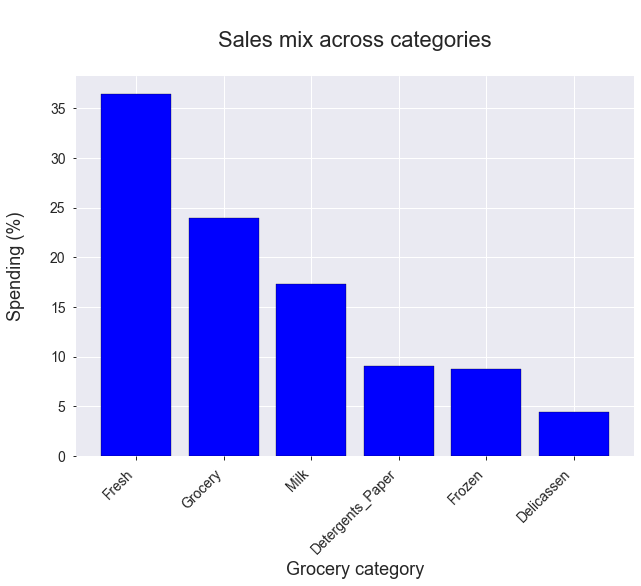

In [314]:
# plot spending fraction across categories
fig, ax = plt.subplots(1,1,figsize=(10,7))
plt.bar(sales_fraction['Category'],
        100*sales_fraction['Spending (%)'],
        color='blue', 
        edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('\nSales mix across categories\n', size=22)
plt.xlabel('Grocery category', size=18)
plt.ylabel('Spending (%)\n', size=18)
ax.tick_params(labelsize=14)

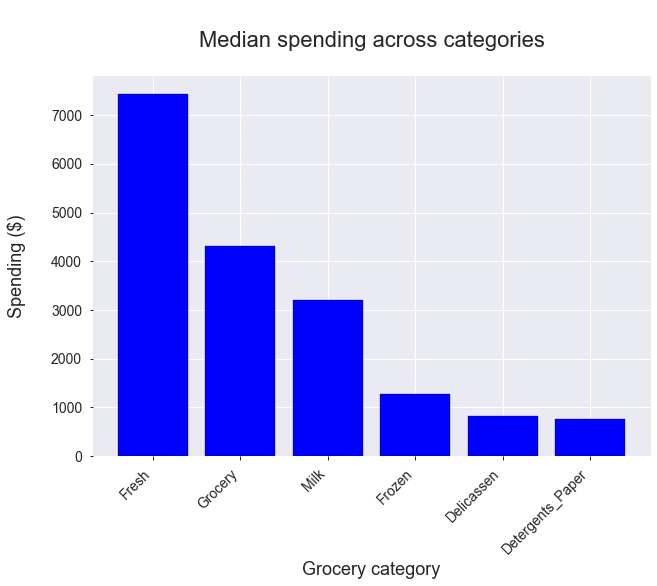

In [143]:
# plot median values across categories
fig, ax = plt.subplots(1,1,figsize=(10,7))
plt.bar(median_values.columns, 
        median_values.iloc[0],
        color='blue', 
        edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('\nMedian spending across categories\n', size=22)
plt.xlabel('Grocery category', size=18)
plt.ylabel('Spending ($)\n', size=18)
ax.tick_params(labelsize=14)

### Customers with zero spending

In [289]:
# what fraction of customers have zero spending in a given category?
data_4_zeros_fraction = pd.DataFrame({'zero fraction': (data_4 == 0).astype(int).sum(axis=0)/len(data_4)})

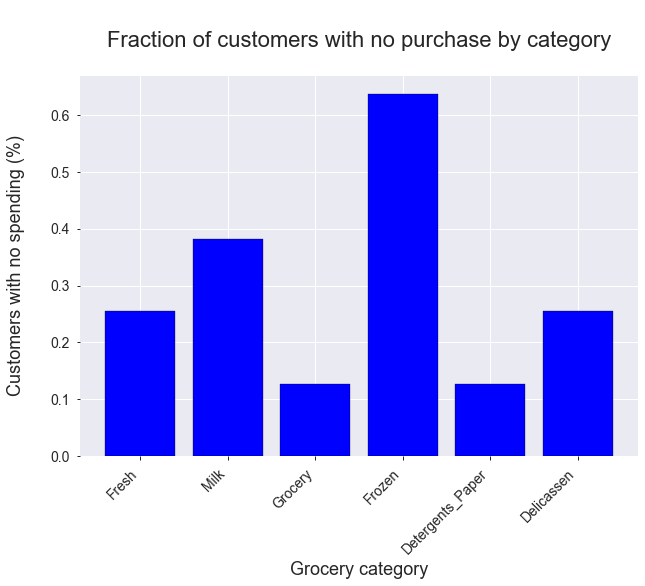

In [286]:
# plot median values across categories
data = data_4_zeros_fraction.T.drop(columns=['Channel', 'Customer', 'Year'])
fig, ax = plt.subplots(1,1,figsize=(10,7))
plt.bar(data.columns, 
        data.iloc[0]*100,
        color='blue', 
        edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('\nFraction of customers with no purchase by category\n', size=22)
plt.xlabel('Grocery category', size=18)
plt.ylabel('Customers with no spending (%)\n', size=18)
ax.tick_params(labelsize=14)

### Customers with high spending

In [291]:
# calculate pairwise comparison outlined above for each category pair
pairwise_spending_temp_2 = pd.DataFrame()
for column_i in median_values.columns:
    for column_j in median_values.columns:
        if column_i != column_j:
            fract = len(data_4[(data_4[str(column_i)] > median_values[str(column_i)].values[0]) & (data_4[str(column_j)] > median_values[str(column_j)].values[0])]) / len(data_4)
            pairwise_spending_temp = pd.DataFrame({str(column_i): fract}, index=[column_j])
            pairwise_spending_temp_2 = pairwise_spending_temp_2.append(pairwise_spending_temp, sort=True)
pairwise_spending = pairwise_spending_temp_2.reset_index().groupby('index').sum()

In [338]:
# calculate pairwise comparison outlined above for each category pair
threewise_spending_temp_2 = pd.DataFrame()
for counter_i, column_i in enumerate(median_values.columns):
    for counter_j, column_j in enumerate(median_values.columns):
        for counter_k, column_k in enumerate(median_values.columns):
            if (column_i != column_j) & (column_i != column_k) & (column_j != column_k) & (counter_i < counter_j) & (counter_i < counter_k) & (counter_j < counter_k):
                fract = len(data_4[(data_4[str(column_i)] > median_values[str(column_i)].values[0]) & (data_4[str(column_j)] > median_values[str(column_j)].values[0]) & (data_4[str(column_k)] > median_values[str(column_k)].values[0])]) / len(data_4)
#                 print(column_i, column_j, column_k)
#                 print(fract, '\n***')
                threewise_spending_temp = pd.DataFrame({'category 1': column_i,
                                                        'category 2': column_j,
                                                        'category 3': column_k,
                                                        'fract above median': fract}, index=[0])
                threewise_spending_temp_2 = threewise_spending_temp_2.append(threewise_spending_temp, sort=True)
# threewise_spending = threewise_spending_temp_2.reset_index().groupby('index').sum()
threewise_spending_temp_2.sort_values('fract above median')

,category 1,category 2,category 3,fract above median
0,Fresh,Frozen,Detergents_Paper,0.105867
0,Fresh,Milk,Frozen,0.125000
0,Fresh,Grocery,Frozen,0.126276
0,Fresh,Delicassen,Detergents_Paper,0.133929
0,Frozen,Delicassen,Detergents_Paper,0.137755
0,Fresh,Milk,Delicassen,0.151786
0,Fresh,Grocery,Delicassen,0.154337
0,Fresh,Milk,Detergents_Paper,0.156888
0,Milk,Frozen,Delicassen,0.156888
0,Grocery,Frozen,Detergents_Paper,0.163265


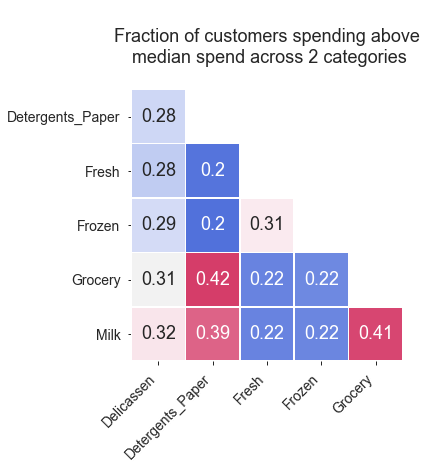

In [290]:
# plot pairwise spending heatmap

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(pairwise_spending_2, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# generate custom diverging colormap
cmap = sns.diverging_palette(260, 0, n=9, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pairwise_spending_2, 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            fmt='0.2g',
            annot_kws={"fontsize":18},
            vmin=0.2, 
            vmax=pairwise_spending_2.max().max(),
            square=True, 
            linewidths=.5, 
            cbar=False)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', fontsize=14)
ax.set_ylim(6,1)
ax.set_xlim(0,5)
ax.set_facecolor([1,1,1])
plt.ylabel('')
ax.set_title('\nFraction of customers spending above\n median spend across 2 categories\n', fontsize=18)
plt.show()

### View correlation across spending categories

In [84]:
# get feature correlation
data_4.corr()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,-0.033853,-0.045693,-0.214095,0.431299,0.558732,-0.204570,0.603254,0.029372
Customer,-0.033853,1.000000,0.012915,0.042454,-0.033870,0.012193,0.020819,-0.017219,0.009456
Year,-0.045693,0.012915,1.000000,0.082609,0.099103,0.101627,0.100687,0.046899,0.064518
Fresh,-0.214095,0.042454,0.082609,1.000000,0.088482,-0.009849,0.358867,-0.106370,0.245036
Milk,0.431299,-0.033870,0.099103,0.088482,1.000000,0.720054,0.116918,0.673170,0.357508
Grocery,0.558732,0.012193,0.101627,-0.009849,0.720054,1.000000,-0.026621,0.908725,0.195401
Frozen,-0.204570,0.020819,0.100687,0.358867,0.116918,-0.026621,1.000000,-0.123404,0.413912
Detergents_Paper,0.603254,-0.017219,0.046899,-0.106370,0.673170,0.908725,-0.123404,1.000000,0.068619
Delicassen,0.029372,0.009456,0.064518,0.245036,0.357508,0.195401,0.413912,0.068619,1.000000


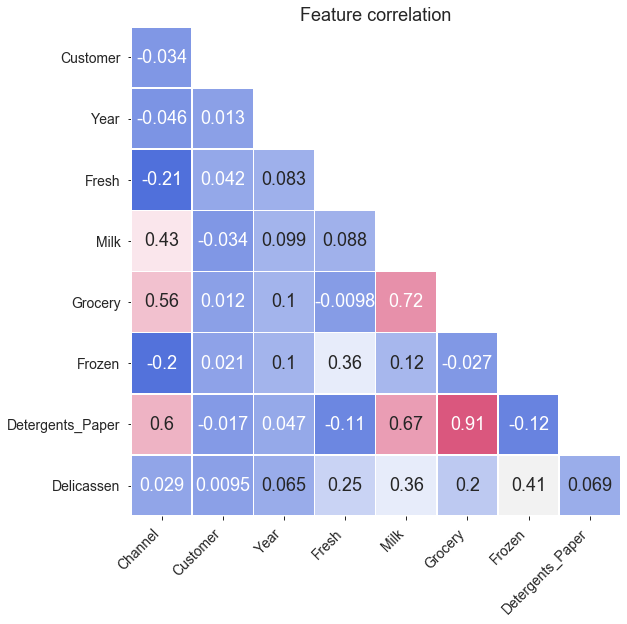

In [316]:
# plot correlation heatmap

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_4.corr(), dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate custom diverging colormap
cmap = sns.diverging_palette(260, 0, n=9, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_4.corr(), 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            fmt='0.2g',
            annot_kws={"fontsize":18},
            vmin=data_4.corr().min().min(), 
            vmax=data_4.corr().max().max(),
            square=True, 
            linewidths=.5, 
            cbar=False)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', fontsize=14)
ax.set_ylim(9,1)
ax.set_xlim(0,8)
ax.set_facecolor([1,1,1])
ax.set_title('Feature correlation', fontsize=18)
plt.show()

### Principle component analysis (PCA)

In [318]:
# PCA: fit 9 features to 2 principle components 

# normalize features
data_5 = data_4.drop(columns=['Channel', 'Customer', 'Year'])
# data_5

In [325]:
X_pca = (data_5 - data_5.mean())/data_5.std()
# X_pca

In [320]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

# Create dataframe of principle components (PCA X values)
X_pca_df = pd.DataFrame(data = principalComponents, 
                      columns = ['Component 1', 'Component 2'])

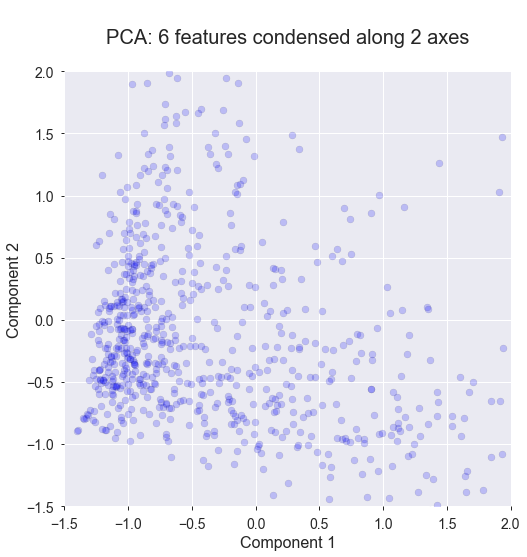

In [324]:
# Plot PCA result - no clear clusters
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 16)
ax.set_ylabel('Component 2', fontsize = 16)
ax.set_title('\nPCA: 6 features condensed along 2 axes\n', fontsize = 20)
ax.scatter(X_pca_df['Component 1'], X_pca_df['Component 2'], color='b', edgecolor='k', alpha=0.2)
plt.xlim(-1.5, 2)
plt.ylim(-1.5, 2)
ax.tick_params(labelsize=14)

# Insert new content above this spacer
# 
# 
# 
# 
# 
# 